# **Ejercicio: Predicci√≥n de caudal en funci√≥n del clima**

**Contexto**: Se desea predecir el caudal diario (Q) de un r√≠o con base en variables meteorol√≥gicas. Se dispone de registros hist√≥ricos de:
- Precipitaci√≥n diaria (P) en mm
- Temperatura media diaria (T) en ¬∞C
- Radiaci√≥n solar diaria (R) en MJ/m¬≤
- Y el caudal observado (Q) en m¬≥/s

## Paso 1: Cargar y explorar los datos
Generamos datos simulados (aleatorios). Puedes reemplazarlos por datos reales en formato CSV o Excel.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Leer el archivo CSV con separador de columnas y posibles comas como separador decimal
ruta = '/content/drive/MyDrive/METODOS_Y_MODELOS/5_Quinta_Sesion/Datos_5/Serie_Climatologica_Bogota_2024_AJUSTADA.csv'
df = pd.read_csv(ruta)#, sep=';', decimal=',')
df.head()

Fecha  Temperatura_C  Precipitacion_mm  Radiacion_Wh_m2  Caudal_m3s
0  2024-01-01      12.956752          8.407785      4887.444020         0.0
1  2024-01-02      14.401584          5.937916      4621.067467         0.0
2  2024-01-03      14.179052          4.759799      4242.718623         0.0
3  2024-01-04      15.039937          1.509470      4560.242318         0.0
4  2024-01-05      14.354200          0.893627      4161.262342         0.0

# ============================================
# **Introducci√≥n a la librer√≠a scikit-learn**
# ============================================

## M√©todos principales de la librer√≠a:

```
- fit(X, y): Ajusta el modelo a los datos
- predict(X): Predice los valores de salida
- score(X, y): Retorna el R¬≤ del modelo (bondad de ajuste)
- intercept_: T√©rmino independiente (Œ≤‚ÇÄ)
- coef_: Coeficientes del modelo (Œ≤‚ÇÅ, Œ≤‚ÇÇ, ...)
```

# ============================================


## Paso 2: Regresi√≥n lineal simple
**Pregunta:** ¬øQu√© tan bien se explica el caudal solo con la precipitaci√≥n?

## **C√°lculo de parametros del modelo de Regresi√≥n Lineal Simple - (M√©todo An√°litico)**




In [ ]:
# Seleccionar variables
x = df['Precipitacion_mm'].values
y = df['Caudal_m3s'].values


Pendiente (beta_1): 0.18018673924096815
Intercepto (beta_0): 3.483103406242981


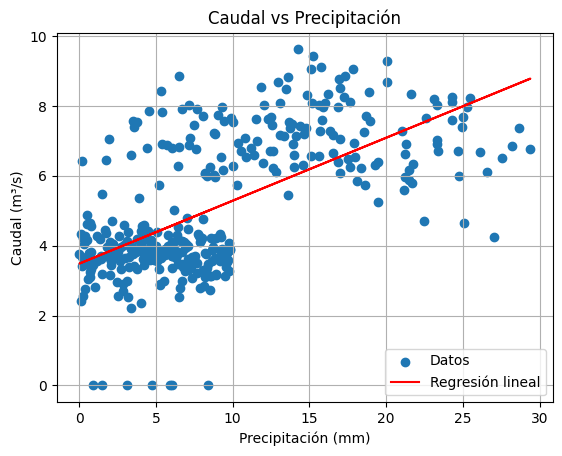

## **Modelo ajustado:**

$
y = 3.4831 + 0.1801 x
$

**Interpretaci√≥n:**

- Cuando no hay precipitaci√≥n $(x = 0)$, el caudal es aproximadamente **3.48 m¬≥/s**.
- Por cada mil√≠metro adicional de precipitaci√≥n, el caudal aumenta en promedio **0.1801 m¬≥/s**.


## **C√°lculo de parametros del modelo de Regresi√≥n Lineal Simple - (M√©todo Solver Python)**

Intercepto: 3.4831034062429813
Pendiente: [0.18018674]


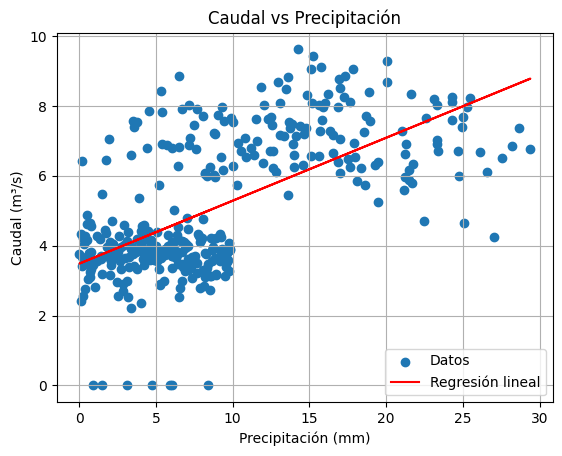

In [ ]:
from sklearn.linear_model import LinearRegression

# Nota: aunque sea una sola variable, X1 se pone #con doble corchete [['...']]
# para que sea un DataFrame y no una Serie, ya que scikit-learn espera una matriz de entrada.
X1 = df[['Precipitacion_mm']]

# y es la variable respuesta ‚Üí Caudal.
y = df['Caudal_m3s']

# Aqu√≠ se crea un modelo de regresi√≥n lineal (LinearRegression())
# Luego, .fit(X1, y) entrena el modelo: calcula los valores √≥ptimos de
# ùõΩ0 (intercepto) y ùõΩ1 (pendiente) de la recta.
modelo_simple = LinearRegression().fit(X1, y)

# Muestra el valor de ùõΩ0, es decir, el valor del caudal cuando la precipitaci√≥n es cero.
print("Intercepto:", modelo_simple.intercept_)

#Muestra ùõΩ1, o sea, cu√°nto aumenta el caudal por cada unidad de precipitaci√≥n (mm).
#coef_ devuelve un array (porque podr√≠a haber m√°s de una variable predictora).
print("Pendiente:", modelo_simple.coef_)


#Genera las predicciones de caudal para cada valor observado de
#Precipitaci√≥n usando el modelo entrenado.
#Es decir, aplica la f√≥rmula: y‚Äã=Œ≤0+Œ≤1x
y_pred = modelo_simple.predict(X1)
#print(y_pred)

#Grafica
plt.scatter(X1, y, label="Datos")
plt.plot(X1, y_pred, color='red', label="Regresi√≥n lineal")
plt.xlabel("Precipitaci√≥n (mm)")
plt.ylabel("Caudal (m¬≥/s)")
plt.title("Caudal vs Precipitaci√≥n")
plt.legend()
plt.grid(True)
plt.show()

## Paso 3: Regresi√≥n lineal m√∫ltiple
**Pregunta:** ¬øSe mejora la predicci√≥n del caudal si se incluyen todas las variables clim√°ticas?

### Solucion Anal√≠tica

In [ ]:
import numpy as np

# Paso 1
X = np.array([[1, 1, 2],
              [1, 2, 1],
              [1, 3, 4]])


array([2.25, 2.25, 0.25])

### Soluci√≥n con Scikit-learn


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Matriz de caracter√≠sticas con columna de unos incluida
X = np.array([[1, 1, 2],
              [1, 2, 1],
              [1, 3, 4]])

# Vector de salida
y = np.array([5, 7, 10])

# Crear modelo sin intercepto, porque ya est√° incluido en X
model = LinearRegression(fit_intercept=False)

# Ajustar el modelo
model.fit(X, y)

# Mostrar coeficientes (Œ≤)
print("Coeficientes Œ≤ =", model.coef_)
print("Coeficientes Œ≤ =", model.intercept_)


Coeficientes Œ≤ = [2.25 2.25 0.25]
Coeficientes Œ≤ = 0.0


### Soluci√≥n del Ejercicio de Predicci√≥n del Caudal con Scikit-learn

In [ ]:
X_multi = df[['Precipitacion_mm', 'Temperatura_C', 'Radiacion_Wh_m2']]
y = df['Caudal_m3s']

modelo_multi = LinearRegression(fit_intercept=True)
modelo_multi.fit(X_multi, y)

print("Intercepto:", modelo_multi.intercept_)
print("Coeficientes:", modelo_multi.coef_)

Intercepto: 8.745127645659021
Coeficientes: [ 0.13212873  0.09558678 -0.00171232]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


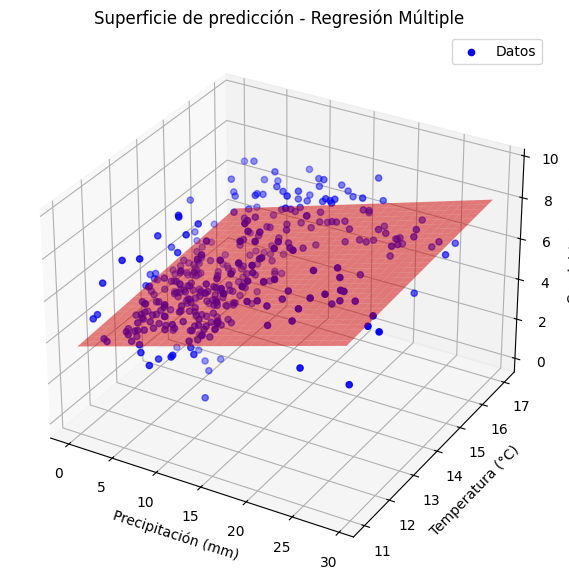

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Definir mallas
P_range = np.linspace(df['Precipitacion_mm'].min(), df['Precipitacion_mm'].max(), 30)
T_range = np.linspace(df['Temperatura_C'].min(), df['Temperatura_C'].max(), 30)
P_mesh, T_mesh = np.meshgrid(P_range, T_range)
R_mean = df['Radiacion_Wh_m2'].mean()

# Predicci√≥n sobre la malla
X_mesh = np.column_stack((P_mesh.ravel(), T_mesh.ravel(), np.full(P_mesh.size, R_mean)))
y_mesh_pred = modelo_multi.predict(X_mesh)

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Precipitacion_mm'], df['Temperatura_C'], y, color='blue', label='Datos')
ax.plot_surface(P_mesh, T_mesh, y_mesh_pred.reshape(P_mesh.shape), alpha=0.5, color='red')

ax.set_xlabel('Precipitaci√≥n (mm)')
ax.set_ylabel('Temperatura (¬∞C)')
ax.set_zlabel('Caudal (m¬≥/s)')
ax.set_title('Superficie de predicci√≥n - Regresi√≥n M√∫ltiple')

plt.legend()
plt.show()


## Paso 4: Regresi√≥n polin√≥mica (grado 2)

### **¬øCu√°ndo usarla?**
> * Cuando los datos no siguen una relaci√≥n lineal, pero la curva tiene una forma suave y continua (como una par√°bola, campana o curva ascendente/descendente).
> * Por ejemplo, el caudal de un r√≠o puede aumentar con la precipitaci√≥n, pero despu√©s de cierto punto se satura o se dispersa ‚Üí una curva lo representa mejor que una l√≠nea recta.
   
   
**Pregunta:** *¬øQu√© pasa si el efecto de la precipitaci√≥n no es lineal?*

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


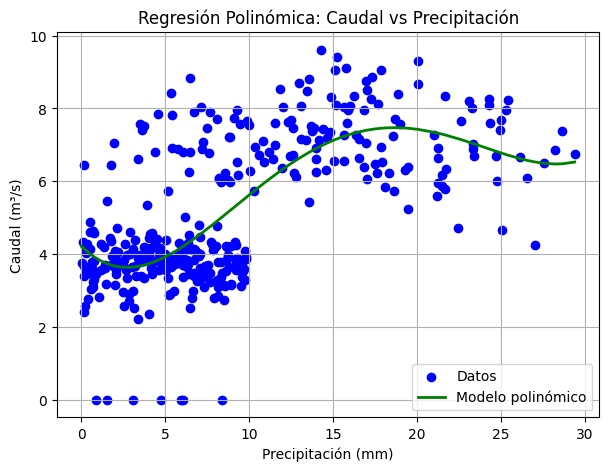

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Crear transformador polin√≥mico de grado 2
#Esto crea un transformador de variables que va a generar:
# - Una columna para ùë•0=1 (intercepto)
# - Una columna para ùë•1
# - Una columna para ùë•2
poly = PolynomialFeatures(degree=4)

# Preparar variables
# X: matriz de entrada (precipitaci√≥n), en forma de DataFrame.
# y: vector objetivo (caudal).
# X_poly: resultado de transformar la columna de precipitaci√≥n a un dise√±o polin√≥mico de grado 2.
# Transformar X para incluir la columna P^2
# Ejemplo: si ùë•=10, obtienes [1,10,100]
X = df[['Precipitacion_mm']]
y = df['Caudal_m3s']
X_poly = poly.fit_transform(X)

# Ajustar modelo
# Se ajusta el modelo de regresi√≥n a los datos transformados
#Esto te da un modelo de la forma: y=ùõΩ0+ùõΩ1x+ùõΩ2x^2
modelo_poly = LinearRegression().fit(X_poly, y)

#GRAFICA
# Ordenar X para graficar suavemente
X_sorted = np.sort(X.values.reshape(-1))  # convierte a vector ordenado
# Transforma los valores ordenados en su forma polin√≥mica.
X_sorted_poly = poly.transform(X_sorted.reshape(-1, 1))  # transforma a polin√≥mico

#Se usan los valores ordenados de precipitaci√≥n para predecir el caudal estimado por el modelo cuadr√°tico.
# Predicciones ordenadas
y_pred_sorted = modelo_poly.predict(X_sorted_poly)

# Graficar
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Datos", color='blue')
plt.plot(X_sorted, y_pred_sorted, color='green', linewidth=2, label="Modelo polin√≥mico")
plt.xlabel("Precipitaci√≥n (mm)")
plt.ylabel("Caudal (m¬≥/s)")
plt.title("Regresi√≥n Polin√≥mica: Caudal vs Precipitaci√≥n")
plt.legend()
plt.grid(True)
plt.show()

## Paso 5: Regresi√≥n exponencial
**Pregunta:** ¬øEl caudal responde de forma exponencial a la precipitaci√≥n?

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Supongamos que tienes tus datos:
x = df[['Precipitacion_mm']]
y = df['Caudal_m3s']

# Transformar y aplicando logaritmo natural
# para evitar log(0) osea un error
y_log = np.log(np.where(y > 0, y, 0.1))

# Ajustar modelo lineal sobre log(y)
modelo_exp = LinearRegression().fit(x, y_log)

# Coeficientes:
print("log(a):", modelo_exp.intercept_)
print("b:", modelo_exp.coef_[0])

log(a): 1.1526444659840411
b: 0.03993828931739055


In [ ]:
np.log(3)

np.float64(1.0986122886681098)

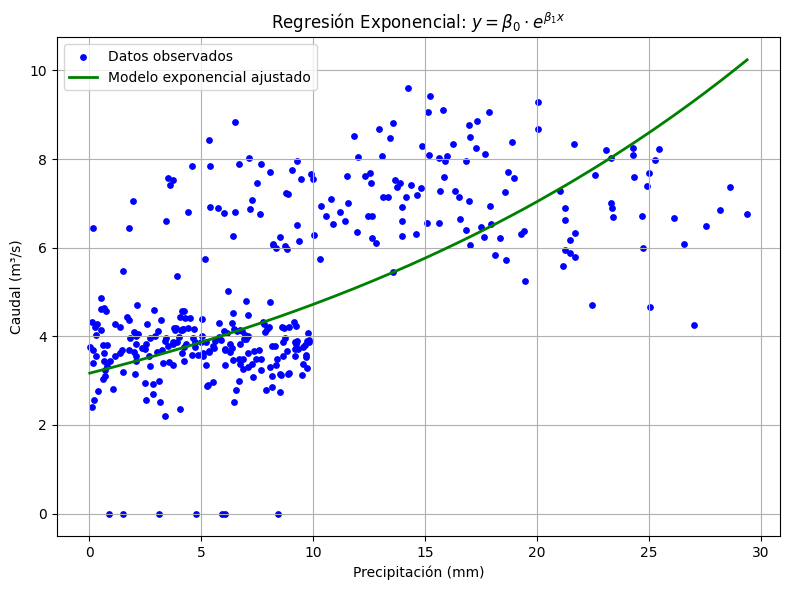

In [ ]:
# Reimportar librer√≠as
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepara las variables
x = df[['Precipitacion_mm']]
y = df['Caudal_m3s']

# Aplicar logaritmo natural
y_log = np.log(np.where(y > 0, y, 0.1))

# Ajustar modelo exponencial linealizado
modelo_exp = LinearRegression().fit(x, y_log)

# Coeficientes del modelo exponencial
log_a = modelo_exp.intercept_
b = modelo_exp.coef_[0]

# Predicci√≥n y = a * exp(bx)
y_pred = np.exp(modelo_exp.predict(x))


# Graficar
# Ordenar los valores para graficar una curva suave
x_sorted = x.sort_values(by='Precipitacion_mm')
y_pred_sorted = np.exp(modelo_exp.predict(x_sorted))

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Datos observados", color='blue', s=15)
plt.plot(x_sorted, y_pred_sorted, label="Modelo exponencial ajustado", color='green', linewidth=2)
plt.xlabel("Precipitaci√≥n (mm)")
plt.ylabel("Caudal (m¬≥/s)")
plt.title("Regresi√≥n Exponencial: $y = \\beta_{0} \\cdot e^{\\beta_{1}x}$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Actividades sugeridas para los estudiantes
1. Comparar visual y num√©ricamente los modelos lineales simple y m√∫ltiple usando $R^2$ y el error cuadr√°tico medio (MSE).
2. Interpretar el coeficiente de la temperatura en la regresi√≥n m√∫ltiple.
3. Evaluar si un modelo exponencial tiene sentido f√≠sico en este contexto.

-----

## **Evaluar si un modelo exponencial tiene sentido f√≠sico en este contexto**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Regresi√≥n Lineal Simple
y_pred_simple = modelo_simple.predict(X1)
r2_simple = r2_score(y, y_pred_simple)
mse_simple = mean_squared_error(y, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y, y_pred_simple)

# Regresi√≥n Lineal M√∫ltiple
y_pred_multi = modelo_multi.predict(X_multi)
r2_multi = r2_score(y, y_pred_multi)
mse_multi = mean_squared_error(y, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y, y_pred_multi)

# Imprimir resultados
print("Modelo Lineal Simple:")
print("R¬≤:", r2_simple)
print("MSE:", mse_simple)
print("RMSE:", rmse_simple)
print("MAE:", mae_simple)

print("\nModelo Lineal M√∫ltiple:")
print("R¬≤:", r2_multi)
print("MSE:", mse_multi)
print("RMSE:", rmse_multi)
print("MAE:", mae_multi)


Modelo Lineal Simple:
R¬≤: 0.3895533627431208
MSE: 2.3670713934497924
RMSE: 1.5385289706241454
MAE: 1.1996035328709076

Modelo Lineal M√∫ltiple:
R¬≤: 0.49707826789538967
MSE: 1.9501322024779946
RMSE: 1.3964713396550588
MAE: 1.1254227987989747


**Evaluaci√≥n f√≠sica**:

- El modelo exponencial implica que el caudal crece de manera acelerada con la precipitaci√≥n.

- Aunque puede aproximar el comportamiento para lluvias moderadas, **no es realista para lluvias muy grandes** porque los sistemas h√≠dricos tienen l√≠mites f√≠sicos.

- Por tanto, el modelo exponencial es √∫til para predicciones locales o moderadas, pero no extrapolables a eventos extremos.